In [1]:
import pandas as pd

In [2]:
import random

In [4]:
L=[]
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)
  L.append(a+b)

In [8]:
len(L)

10000

In [10]:
L[:6]

[7, 3, 7, 8, 11, 8]

In [13]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()


(11,)

In [14]:
import numpy as np
np.cumsum(s)

2     0.0271
3     0.0799
4     0.1631
5     0.2786
6     0.4167
7     0.5780
8     0.7176
9     0.8310
10    0.9138
11    0.9721
12    1.0000
dtype: float64

<Axes: >

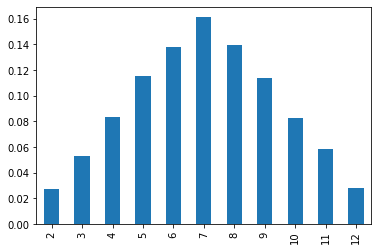

In [15]:
s.plot(kind='bar')

<Axes: >

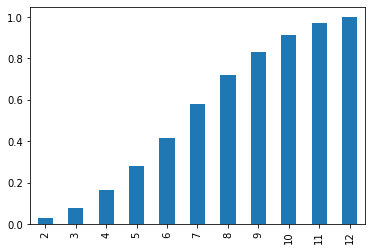

In [16]:
np.cumsum(s).plot(kind='bar')

# text*# Parametric Density Estimation

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [18]:
sample.mean()

50.00005983448593

(array([  8.,  20.,  78., 168., 224., 228., 173.,  74.,  23.,   4.]),
 array([33.59282982, 36.87751066, 40.1621915 , 43.44687235, 46.73155319,
        50.01623403, 53.30091487, 56.58559571, 59.87027656, 63.1549574 ,
        66.43963824]),
 <BarContainer object of 10 artists>)

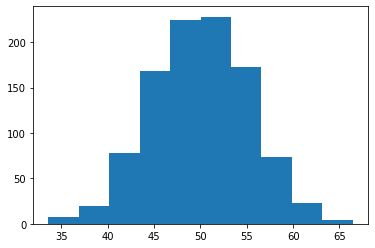

In [19]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [20]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [21]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [22]:
values = np.linspace(sample.min(),sample.max(),100)

In [23]:
sample.max()

66.4396382393708

In [24]:
probabilities = [dist.pdf(value) for value in values]

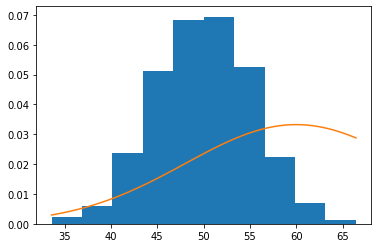

In [25]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

<ipython-input-26-8cd219d00d27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

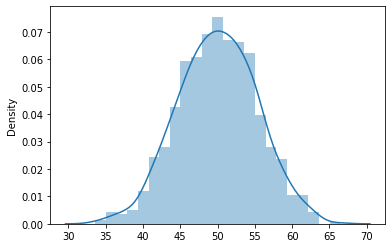

In [26]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [27]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [28]:
sample

array([18.60893324, 26.85959303, 16.57970364, 22.96068315, 20.53148088,
       21.68137121, 15.01025966, 15.55885355, 30.54595949, 14.17728115,
       20.09466394, 23.25284106, 28.09570059, 15.23429931, 26.05211638,
       21.42129187, 31.85942217, 20.42527508, 27.81426718, 20.56276568,
       20.46167969, 21.50511553, 21.12370752, 19.70419904, 26.39055079,
       21.44070391, 18.92675562, 22.94733245, 17.04394914, 21.68404552,
       24.97338749, 14.70312358, 20.46579617, 25.81221041, 21.78658011,
       31.59512055, 14.96207552, 17.08095628, 26.91489235, 22.43363203,
       19.30304142, 22.58183997, 22.24922023, 14.67852824, 20.79123489,
       14.98100636, 19.8565975 , 11.63284756, 18.57598432, 28.17299795,
       22.24880992, 32.52884905, 18.4412886 , 31.2211571 , 17.29692235,
       18.42171762, 16.9903408 , 15.06804867, 13.32311345, 21.75208606,
       22.26418515, 16.07599129, 19.5820279 , 22.93163556, 27.58204318,
       12.43926358, 11.75673197, 16.60293358, 21.9025252 , 23.38

(array([ 1.,  0.,  4.,  2.,  5.,  5.,  7.,  9., 13., 10., 26., 17., 16.,
        21., 19., 26., 22., 24., 14., 12.,  9., 15., 14., 11.,  5., 11.,
        10., 15., 20., 31., 30., 36., 50., 60., 48., 47., 57., 59., 42.,
        44., 26., 24., 23., 14., 18., 13.,  7.,  1.,  5.,  2.]),
 array([ 6.59783931,  7.53579122,  8.47374312,  9.41169503, 10.34964693,
        11.28759884, 12.22555075, 13.16350265, 14.10145456, 15.03940647,
        15.97735837, 16.91531028, 17.85326218, 18.79121409, 19.729166  ,
        20.6671179 , 21.60506981, 22.54302171, 23.48097362, 24.41892553,
        25.35687743, 26.29482934, 27.23278125, 28.17073315, 29.10868506,
        30.04663696, 30.98458887, 31.92254078, 32.86049268, 33.79844459,
        34.73639649, 35.6743484 , 36.61230031, 37.55025221, 38.48820412,
        39.42615603, 40.36410793, 41.30205984, 42.24001174, 43.17796365,
        44.11591556, 45.05386746, 45.99181937, 46.92977127, 47.86772318,
        48.80567509, 49.74362699, 50.6815789 , 51.61953081,

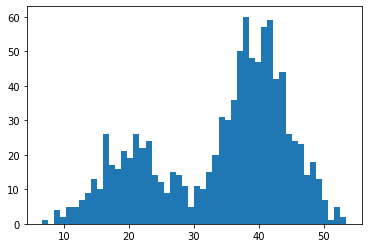

In [29]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [30]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [31]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [32]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

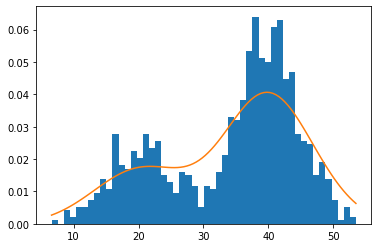

In [33]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

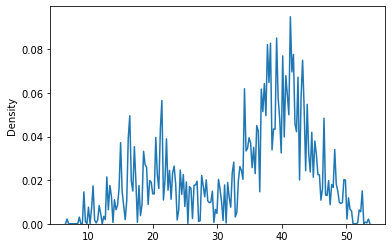

In [34]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [35]:
import seaborn as sns

In [36]:
df = sns.load_dataset('iris')

<Axes: xlabel='sepal_length', ylabel='Density'>

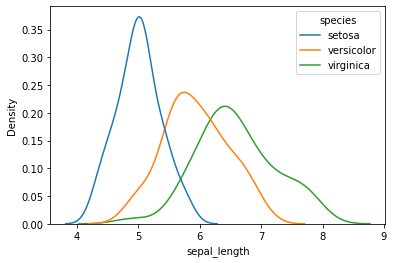

In [37]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

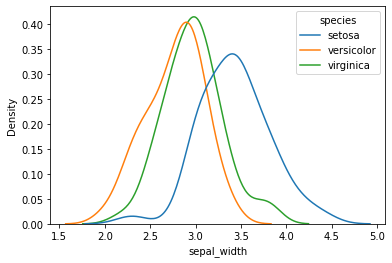

In [38]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

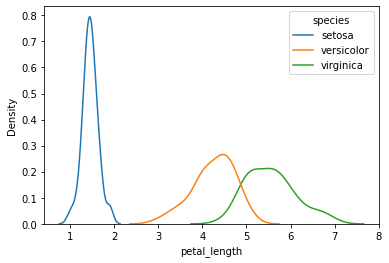

In [39]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

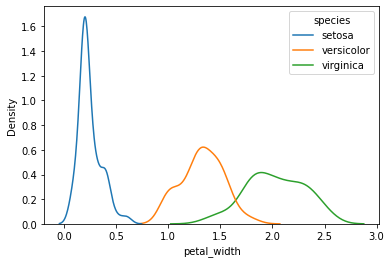

In [40]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

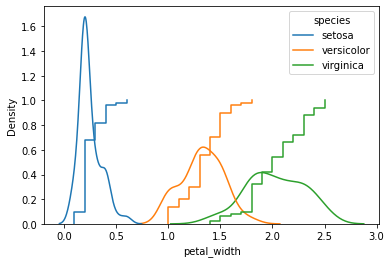

In [43]:
sns.kdeplot(data=df,x='petal_width',hue='species')
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [44]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

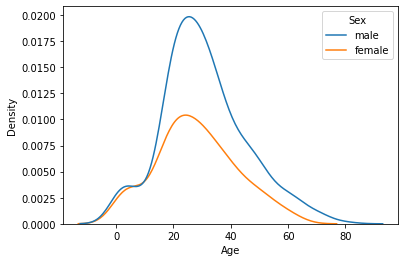

In [46]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

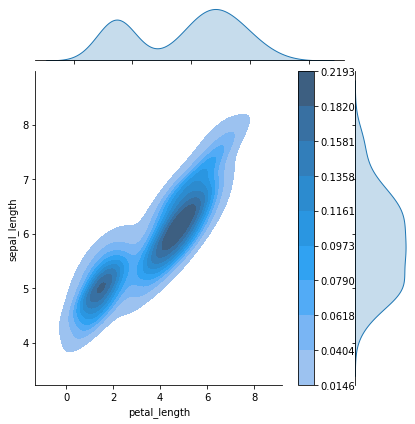

In [47]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

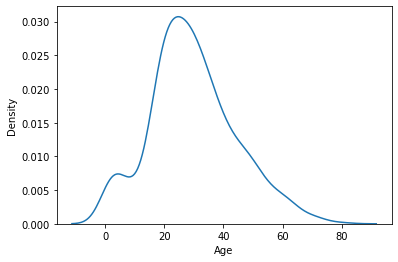

In [48]:
sns.kdeplot(titanic['Age'])

In [49]:
titanic['Age'].mean()

29.69911764705882

In [51]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

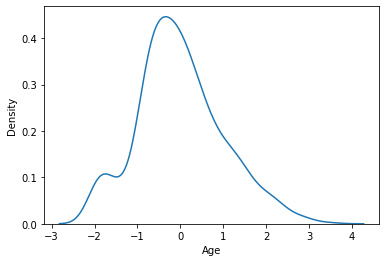

In [52]:
sns.kdeplot(x)

In [53]:
x.mean()

2.338621049070358e-16

In [54]:
x.std()

1.0

In [55]:
titanic['Age'].skew()

0.38910778230082704

In [56]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [57]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [58]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [59]:
titanic['Age'].max()

80.0